## VWAP（出来高加重平均）

VWAP（その日の平均約定価格）を知ることができれば、VWAP価格で株を買えば少なくともその日に高値掴みすることはなくなり、平均的な価格で取引ができる

## Log returns

差分の対数をとってログで評価

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
book_trainparquet = pd.read_parquet("../input/book_train.parquet/stock_id=0")
book_testparquet = pd.read_parquet("../input/book_test.parquet/stock_id=0")

In [6]:
book_testparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [7]:
book_trainparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
917548,32767,568,0.998275,0.998754,0.997796,0.998946,90,90,48,28
917549,32767,569,0.998275,0.998754,0.997892,0.998946,91,90,200,28
917550,32767,571,0.998275,0.998754,0.997892,0.998946,91,90,100,28
917551,32767,572,0.998275,0.998754,0.997892,0.998946,92,90,100,28


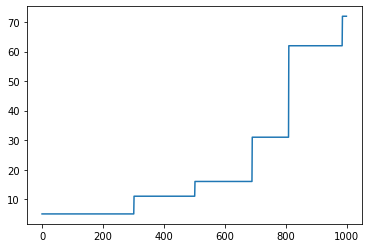

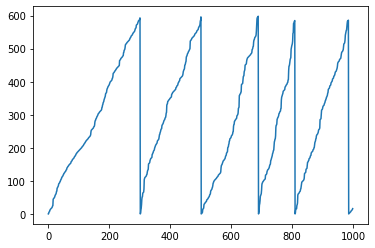

In [8]:
plt.plot(np.array(book_trainparquet["time_id"][:1000]))
plt.show()
plt.plot(np.array(book_trainparquet["seconds_in_bucket"][:1000]))

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_id', ylabel='count'>

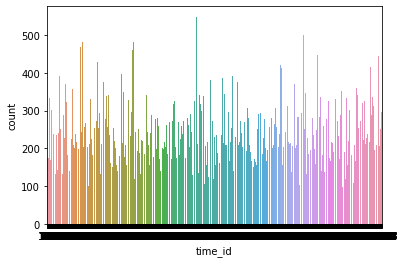

In [9]:
sns.countplot(book_trainparquet["time_id"])

## time_id = 5 に着目

In [10]:
book_data = book_trainparquet[book_trainparquet["time_id"]==5]

In [11]:
book_data

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,5,0,1.001422,1.002301,1.001370,1.002353,3,226,2,100
1,5,1,1.001422,1.002301,1.001370,1.002353,3,100,2,100
2,5,5,1.001422,1.002301,1.001370,1.002405,3,100,2,100
3,5,6,1.001422,1.002301,1.001370,1.002405,3,126,2,100
4,5,7,1.001422,1.002301,1.001370,1.002405,3,126,2,100
...,...,...,...,...,...,...,...,...,...,...
297,5,585,1.003129,1.003749,1.003025,1.003801,100,3,26,3
298,5,586,1.003129,1.003749,1.002612,1.003801,100,3,2,3
299,5,587,1.003129,1.003749,1.003025,1.003801,100,3,26,3
300,5,588,1.003129,1.003749,1.002612,1.003801,100,3,2,3


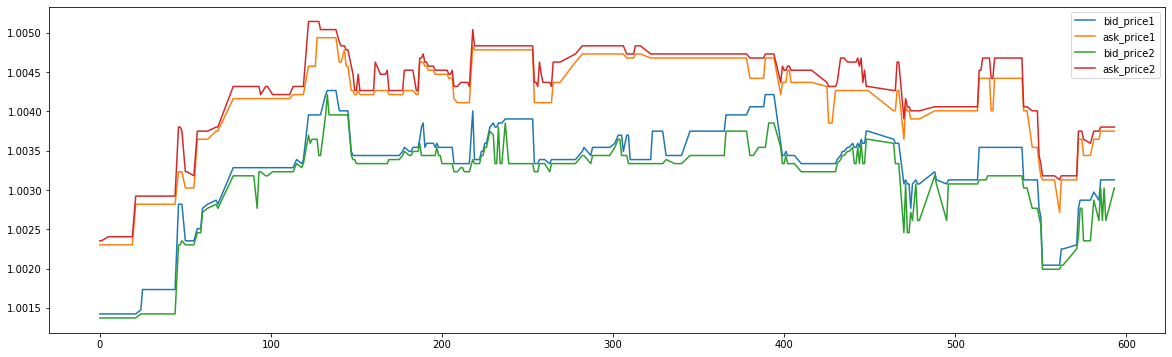

In [12]:
plt.figure(figsize=(20,6))
for i,col in enumerate(['bid_price1','ask_price1','bid_price2','ask_price2']):
    plt.plot(book_data['seconds_in_bucket'],book_data[col],label=col)

plt.legend()
plt.show()

In [13]:
trade_testparquet = pd.read_parquet("../input/trade_test.parquet/stock_id=0")
trade_testparquet

,time_id,seconds_in_bucket,price,size,order_count
0,4,7,1.000344,1,1
1,4,24,1.000049,100,7
2,4,27,1.000059,100,3


In [14]:
trade_trainparquet = pd.read_parquet("../input/trade_train.parquet/stock_id=0")
trade_trainparquet

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


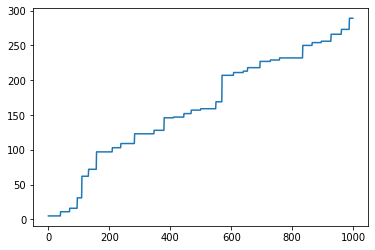

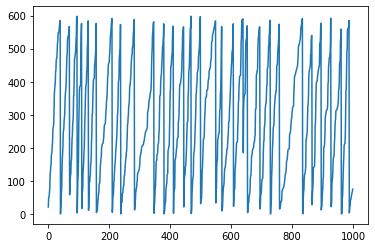

In [15]:
plt.plot(trade_trainparquet["time_id"][:1000])
plt.show()
plt.plot(trade_trainparquet["seconds_in_bucket"][:1000])

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time_id', ylabel='count'>

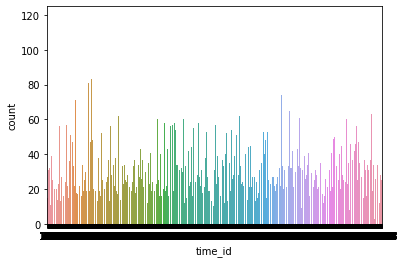

In [16]:
sns.countplot(trade_trainparquet["time_id"])

In [17]:
trade_data = trade_trainparquet[trade_trainparquet['time_id']==5 ]

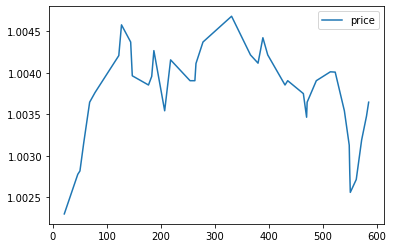

In [18]:
for i,col in enumerate(["price"]):
    plt.plot(trade_data['seconds_in_bucket'],trade_data[col],label=col)
plt.legend()
plt.show()

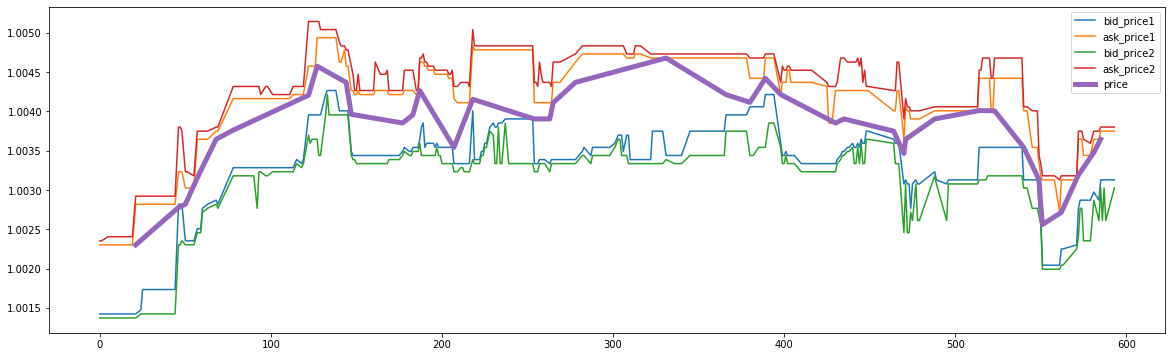

In [19]:
plt.figure(figsize=(20,6))
for i,col in enumerate(['bid_price1','ask_price1','bid_price2','ask_price2']):
    plt.plot(book_data['seconds_in_bucket'],book_data[col],label=col)
plt.plot(trade_data['seconds_in_bucket'],trade_data["price"],label="price",lw=5)
plt.legend()
plt.show()

# ボラティリティについて
今回の目的変数,価格変動の度合い


In [20]:
test = pd.read_csv("../input/test.csv")
test

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


In [21]:
book_testparquet

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2
0,4,0,1.000049,1.000590,0.999656,1.000639,91,100,100,24
1,4,1,1.000049,1.000590,0.999656,1.000639,91,100,100,20
2,4,5,1.000049,1.000639,0.999656,1.000885,290,20,101,15


In [22]:
trade_testparquet

,time_id,seconds_in_bucket,price,size,order_count
0,4,7,1.000344,1,1
1,4,24,1.000049,100,7
2,4,27,1.000059,100,3


In [23]:
train = pd.read_csv("../input/train.csv")
train

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [24]:
train['target'].describe()

count    428932.000000
mean          0.003880
std           0.002936
min           0.000105
25%           0.002026
50%           0.003048
75%           0.004738
max           0.070321
Name: target, dtype: float64

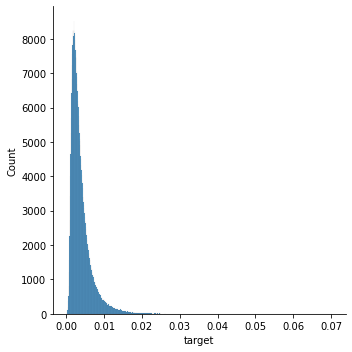

In [25]:
sns.displot(train["target"])

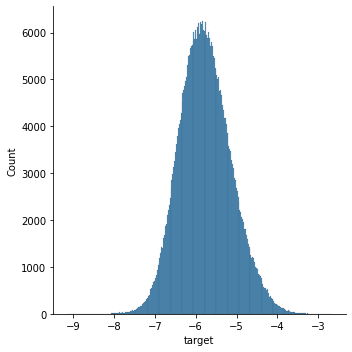

In [26]:
sns.displot(np.log(train["target"]))

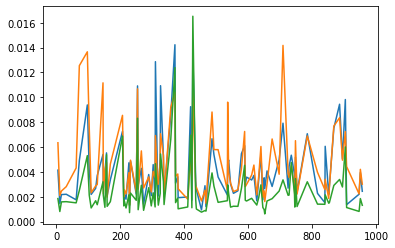

In [27]:
for d in [train[train['stock_id']==x]for x in range(3)]:
    plt.plot(d["time_id"][:100],d['target'][:100])


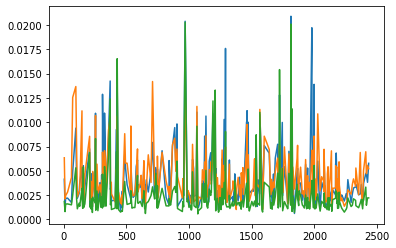

In [28]:
for d in [train[train['stock_id']==x]for x in range(3)]:
    plt.plot(d["time_id"][:300],d['target'][:300])


上のグラフより、stock_id(0,1,2)のtargetの増加するタイミングに少し関連性がありそう。

# 重要な変数の確認


In [29]:
def calc_wap(df):
    wap = (df['bid_price1']*df['ask_size1'] + df['ask_price1']*df['bid_size1'])/(df['bid_size1'] + df['ask_size1'])
    return wap

In [30]:
wap = calc_wap(book_data)

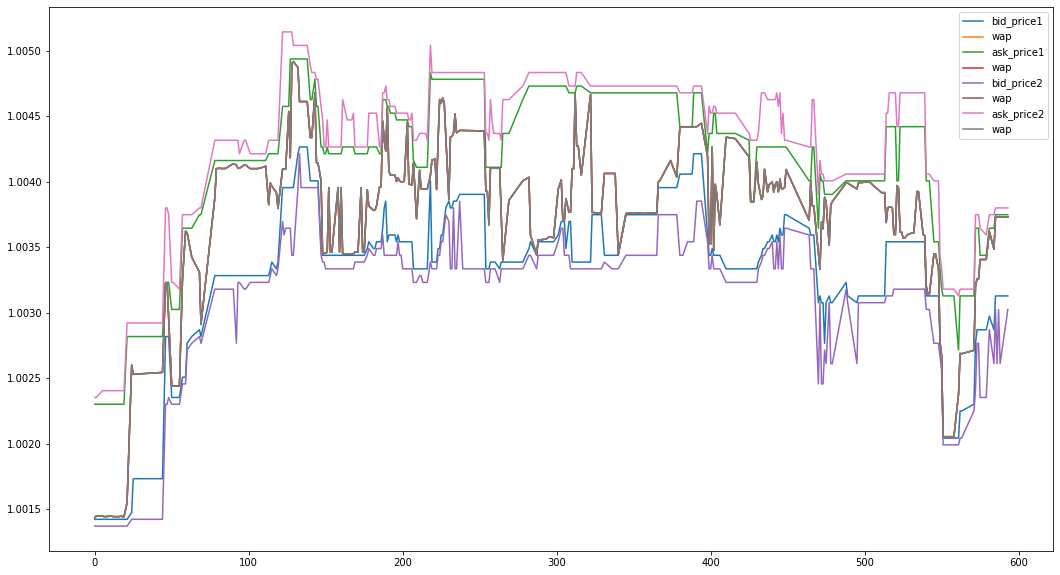

In [31]:
plt.figure(figsize=(18,10))
for i,col in enumerate(['bid_price1','ask_price1','bid_price2', 'ask_price2']):
    plt.plot(book_data["seconds_in_bucket"],book_data[col],label=col)
    plt.plot(book_data["seconds_in_bucket"],wap,label="wap")
plt.legend()

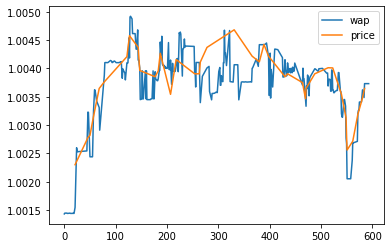

In [32]:
plt.plot(book_data["seconds_in_bucket"],wap,label="wap")
plt.plot(trade_data["seconds_in_bucket"],trade_data["price"],label="price")
plt.legend()

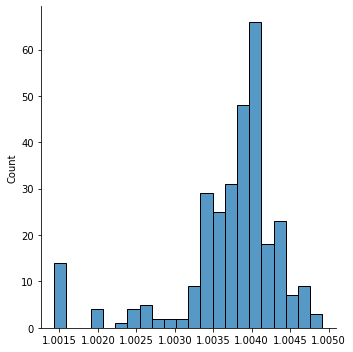

In [33]:
sns.displot(wap)

## log return

wap  →   
→ wapのlog  →   
→ wapのdiff   →   
→ log return（wapのlogのdiff）の順で可視化  



In [34]:
def log_return(list_stock_prices):
    return np.log(list_stock_prices).diff()

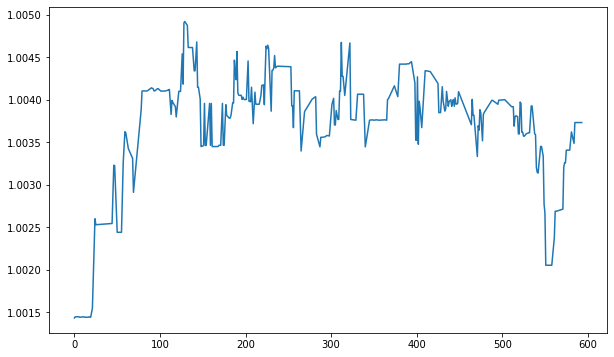

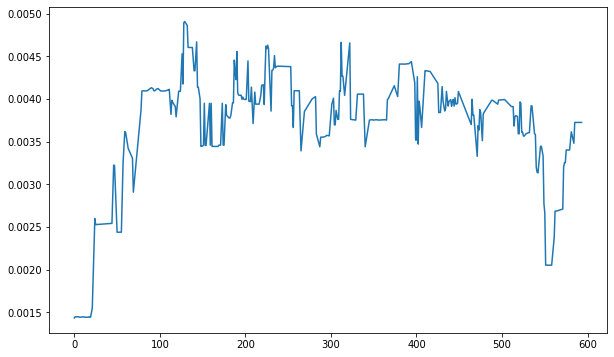

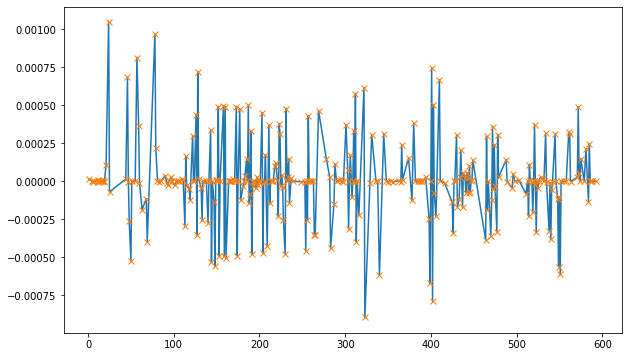

In [35]:
plt.figure(figsize=(10,6))
plt.plot(book_data["seconds_in_bucket"],wap)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(book_data["seconds_in_bucket"],np.log(wap))
plt.show()

plt.figure(figsize=(10,6))
plt.plot(book_data["seconds_in_bucket"],wap.diff())

plt.plot(book_data["seconds_in_bucket"],log_return(wap),'x')
plt.show()

In [36]:
log_return_wap = log_return(wap)[1:]

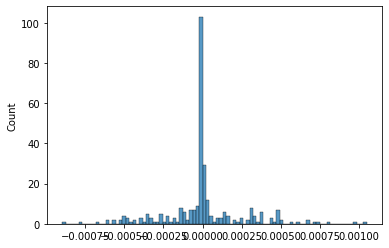

<AxesSubplot:ylabel='Count'>

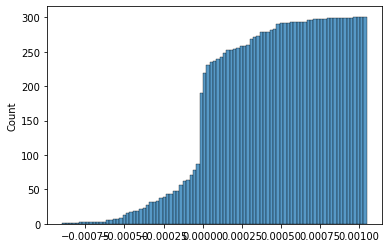

In [37]:
sns.histplot(log_return_wap)
plt.show()
sns.histplot( log_return_wap,cumulative = True )

# Realized volatility

bookのデータから計算されるrealized vovatilityを重要な指標としたほうが良いよ  
->  wapのlog returnの二乗和の平方根

In [38]:
def realized_volatility(series_log_return):
    return np.sqrt(np.sum(series_log_return**2))

In [39]:
realized_vol = realized_volatility(log_return(wap))
realized_vol

0.004499364172786559

In [40]:
train_list = [ 0,
               31,
               18, #ボラティリティの大きな銘柄
               43, #ボラティリティの小さな銘柄
             ]

book_trainparquet_list  = []

for i in train_list:
    book_trainparquet_list.append(pd.read_parquet("../input/book_train.parquet/stock_id="+str(i)))

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

id= 0
0.004499364172786559
id= 31
0.005556935255357987
id= 18
0.014390656273355174
id= 43
0.0018669488720552976


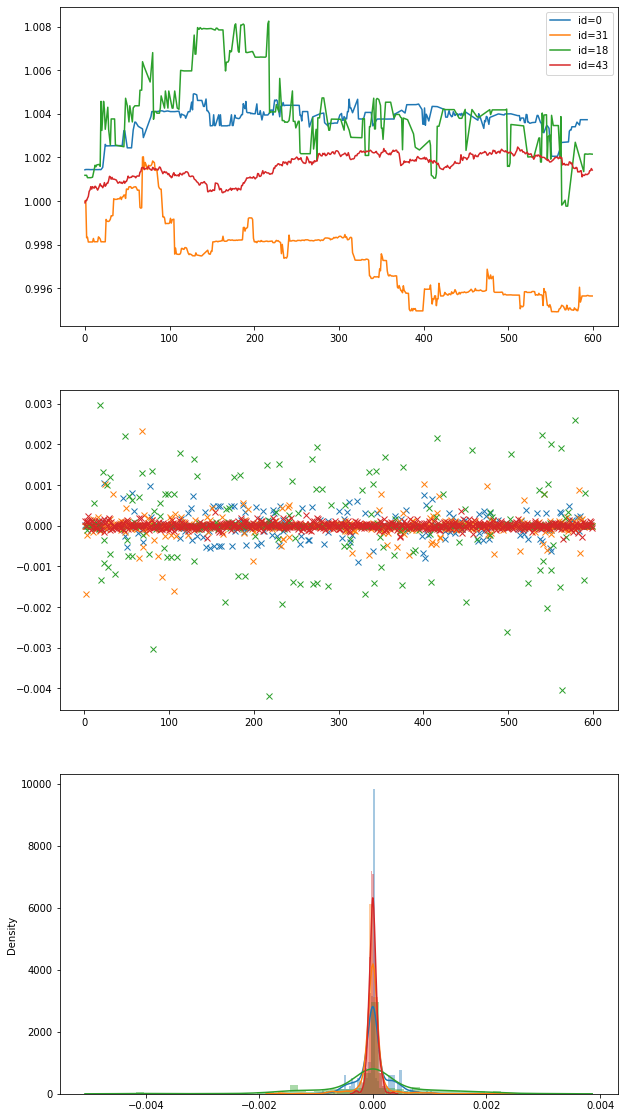

In [41]:
plt.figure(figsize=(10,20))
tid = 5
for i,book in enumerate(book_trainparquet_list):
    book_tid = book[book['time_id']==tid]
    wap = calc_wap(book_tid)
    plt.subplot(3,1,1)
    plt.plot(book_tid['seconds_in_bucket'],wap,label='id='+str(train_list[i]))
    plt.legend()

    logreturn = log_return(wap)
    plt.subplot(3,1,2)
    plt.plot(book_tid['seconds_in_bucket'],logreturn,"x")

    plt.subplot(3,1,3)
    sns.distplot(logreturn)
    realized_vol = realized_volatility(logreturn)
    print("id=",train_list[i])
    print(realized_vol)

plt.show()


# 時系列データ分析


In [42]:
wap = calc_wap(book_data)
log_return_wap = log_return(wap)[1:]
log_return_wap =log_return_wap[log_return_wap!=0]

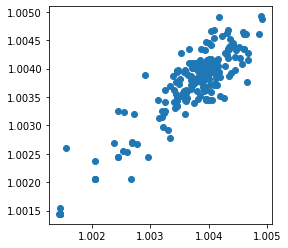

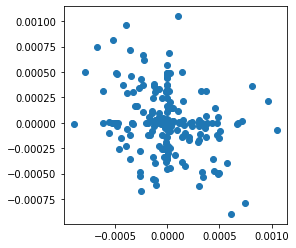

In [43]:
for ff in [wap,log_return_wap]:
    plt.figure(figsize=(4,4))
    plt.plot(ff[:-1],ff[1:],"o")
    plt.show()
    

その他  
自己相関、コレログラムなど

In [44]:
from sklearn.preprocessing import PowerTransformer

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


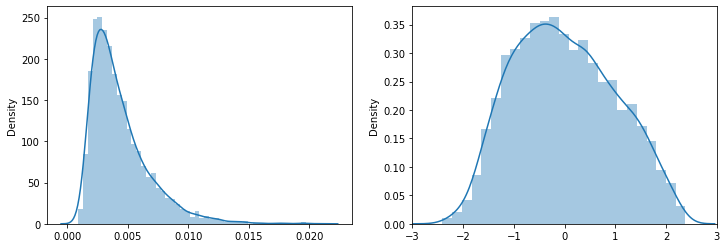

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


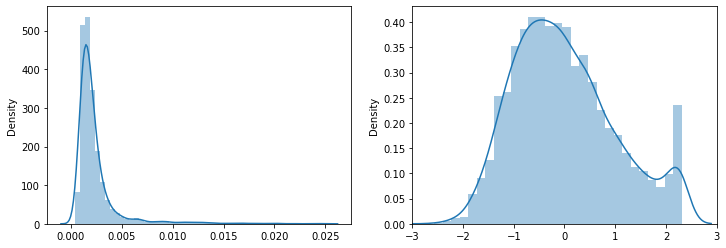

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


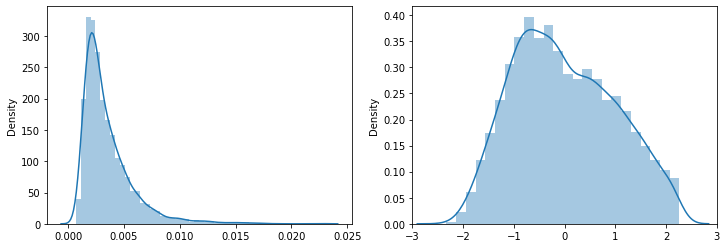

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


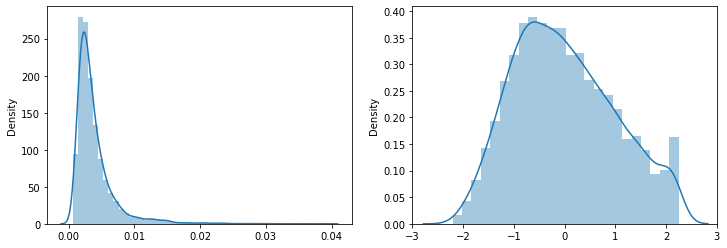

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


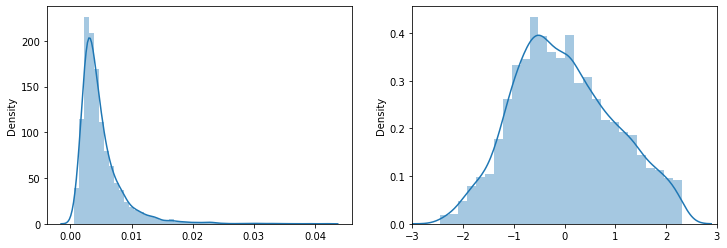

In [45]:
for i in [1,2,10,30,100]:
    #
    xx = np.array(train[train['stock_id']==i]['target'])
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    plt.xlim([0,0.04])
    sns.distplot( xx,ax=ax1 )
    #
    plt.xlim([-3,3])
    scaler = PowerTransformer()
    sns.distplot( scaler.fit_transform(xx.reshape(-1,1)), ax=ax2)
    #
    plt.show()

In [46]:
stock = train.groupby("stock_id")['target'].agg(["mean","median","std","count","sum"]).reset_index()

In [47]:
stock

,stock_id,mean,median,std,count,sum
0,0,0.004028,0.003180,0.002855,3830,15.429071
1,1,0.004362,0.003719,0.002433,3830,16.704962
2,2,0.002385,0.001748,0.002339,3830,9.133223
3,3,0.006182,0.005422,0.003201,3830,23.675414
4,4,0.004197,0.003397,0.002879,3830,16.073408
...,...,...,...,...,...,...
107,122,0.003762,0.003176,0.002300,3830,14.407997
108,123,0.002506,0.001967,0.001816,3830,9.599594
109,124,0.003691,0.003143,0.001953,3830,14.135579
110,125,0.002016,0.001575,0.001703,3830,7.719409


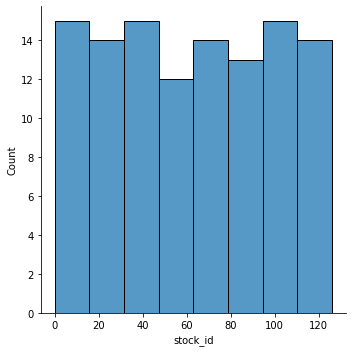

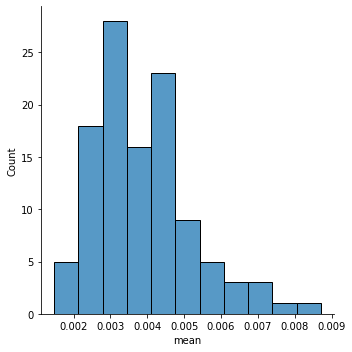

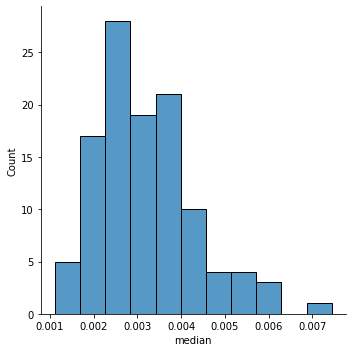

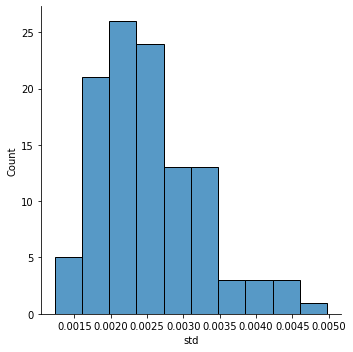

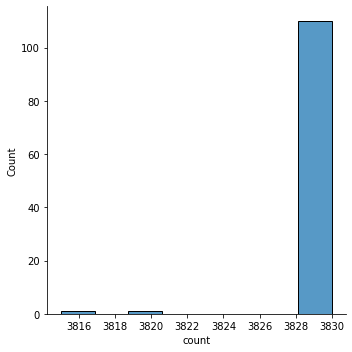

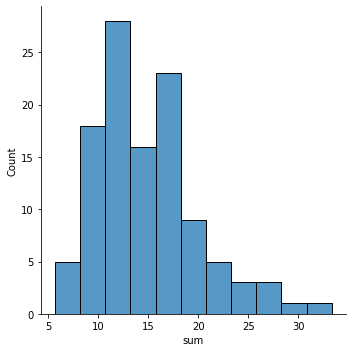

In [48]:
for i in stock.columns:
    sns.displot(stock[i])


In [49]:
train_info = train.copy()

In [50]:
train_info

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747
...,...,...,...
428927,126,32751,0.003461
428928,126,32753,0.003113
428929,126,32758,0.004070
428930,126,32763,0.003357


In [51]:
train_info["mean"] = train["stock_id"].map(dict(zip(stock["stock_id"],stock["mean"])))
train_info["median"] = train["stock_id"].map(dict(zip(stock["stock_id"],stock["median"])))
train_info["std"] = train["stock_id"].map(dict(zip(stock["stock_id"],stock["std"])))

# 決定係数 R^2
r2_score

In [52]:
from sklearn.metrics import r2_score

mean
r2 score = -3.1188389736938005
fit 1d : 1.0000000000002827x+3.3903614535537186e-19


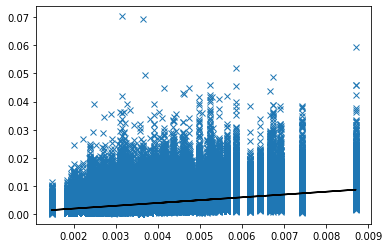

median
r2 score = -4.818292543305453
fit 1d : 1.1405090532200821x+0.0002395268057987483


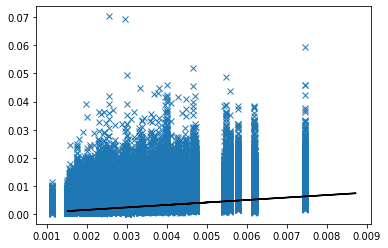

std
r2 score = -16.590607737654555
fit 1d : 1.6179357784999133x+-0.00021658378425358255


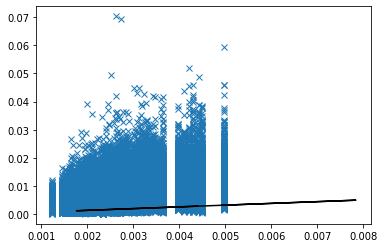

In [53]:
for i,col in enumerate(train_info.columns):
    if i==0 or i==1 or i==2:
        continue
    xx = train_info[col]
    yy = train_info["target"]
    print(col)
    print(f'r2 score = {r2_score(xx,yy)}')
    plt.plot(xx,yy,"x")
    coef = np.polyfit(xx,yy,1) # 2変数の回帰分析
    y_pred = coef[0]*xx+coef[1]
    print(f'fit 1d : {coef[0]}x+{coef[1]}')
    plt.plot(y_pred,xx,'k-')
    plt.show()


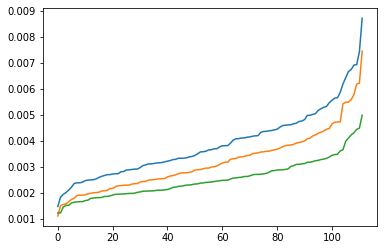

In [54]:
plt.plot(np.sort(np.array(stock["mean"])),label="mean")
plt.plot(np.sort(np.array(stock["median"])),label="median")
plt.plot(np.sort(np.array(stock["std"])),label="std")

それぞれ(mean,median,std)は相関高め?

In [55]:
trade_trainparquet

,time_id,seconds_in_bucket,price,size,order_count
0,5,21,1.002301,326,12
1,5,46,1.002778,128,4
2,5,50,1.002818,55,1
3,5,57,1.003155,121,5
4,5,68,1.003646,4,1
...,...,...,...,...,...
123438,32767,471,0.998659,200,3
123439,32767,517,0.998515,90,1
123440,32767,523,0.998563,1,1
123441,32767,542,0.998803,90,4


# kmeans

In [56]:
from sklearn.cluster import KMeans

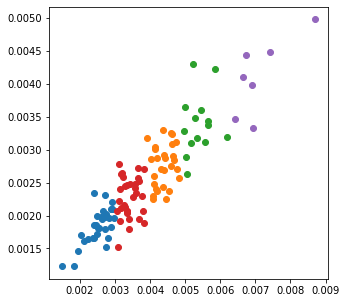

In [57]:
nc = 5
# cust_array = stock.iloc[:,1:4]
# 全部の変数使ったらだめ
# sum (meanと被るのでいらない)
# count (全部ほぼ同じ)

labels = KMeans(n_clusters=nc).fit_predict(stock.iloc[:,1:4])

plt.figure(figsize=(5,5))
for i in range(nc):
    xx = stock['mean'][labels==i]
    yy = stock['std'][labels==i]
    plt.plot(xx,yy,'o')
plt.show()

# 簡易モデルの作成（線形回帰）

In [58]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer


In [59]:
xcol = 'median'
y = np.array(train_info["target"])
X = np.array(train_info[xcol]).reshape(-1,1)

0.1932857909448269


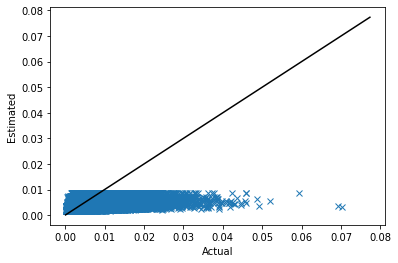

In [60]:
scaler = StandardScaler()
scaler.fit(X)

model = LinearRegression()
model.fit(scaler.transform(X),y)
y_pred = model.predict(scaler.transform(X))
plt.plot(y,y_pred,"x")
mi = min(np.min(y),np.min(y_pred))
ma = max(np.max(y),np.max(y_pred))
plt.plot( [0.9*mi,1.1*ma],[0.9*mi,1.1*ma], 'k-' )

plt.xlabel('Actual')
plt.ylabel('Estimated')
print(r2_score(y,y_pred))

# submit

In [61]:
test

,stock_id,time_id,row_id
0,0,4,0-4
1,0,32,0-32
2,0,34,0-34


In [62]:
X_test = np.array(test['stock_id'].map(dict(zip(stock['stock_id'],stock[xcol])))).reshape(-1,1)

In [63]:
y_pred = model.predict(scaler.transform(X_test))
y_pred

array([0.00386592, 0.00386592, 0.00386592])

In [64]:
sub = test.copy()
sub["target"] = y_pred
sub.drop(['stock_id','time_id'],axis=1,inplace=True)

In [65]:
sub


,row_id,target
0,0-4,0.003866
1,0-32,0.003866
2,0-34,0.003866


In [66]:
# sub.to_csv("submission.csv",index=False)

# rmspe

In [67]:
def rmspe(y_true,y_pred):
    yt = np.array(y_true)
    yp = np.array(y_pred)
    res = np.square((yt-yp)/yp)
    res = np.sqrt(np.mean(res))
    return res

## time_idでの分析

time_id ごとにボラティリティに違いがあるのでは

In [68]:
train["time_id"].describe()

count    428932.000000
mean      16038.972721
std        9365.103706
min           5.000000
25%        7854.000000
50%       15853.000000
75%       23994.000000
max       32767.000000
Name: time_id, dtype: float64

c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

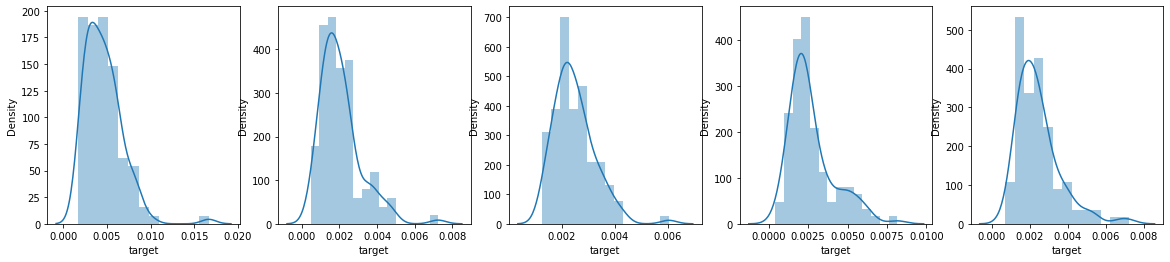

In [71]:
fig,ax = plt.subplots(1,5,figsize=(20,4))
for i,time_id in enumerate([5,11,16,31,62]):
    sns.distplot(train[train["time_id"]==time_id]["target"],ax=ax[i])
plt.show()

In [76]:
time = train.groupby(["time_id"])["target"].agg(["mean","median","std","count","sum"]).reset_index()


In [77]:
time

,time_id,mean,median,std,count,sum
0,5,0.004618,0.004270,0.002179,112,0.517230
1,11,0.002042,0.001831,0.001085,112,0.228744
2,16,0.002471,0.002354,0.000774,112,0.276701
3,31,0.002700,0.002201,0.001431,112,0.302451
4,62,0.002448,0.002254,0.001146,112,0.274201
...,...,...,...,...,...,...
3825,32751,0.002870,0.002546,0.001261,112,0.321472
3826,32753,0.001998,0.001690,0.001340,112,0.223760
3827,32758,0.002517,0.002478,0.000877,112,0.281904
3828,32763,0.004492,0.004304,0.001461,112,0.503131


c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\mahir\デスクトップ\kaggle_env\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

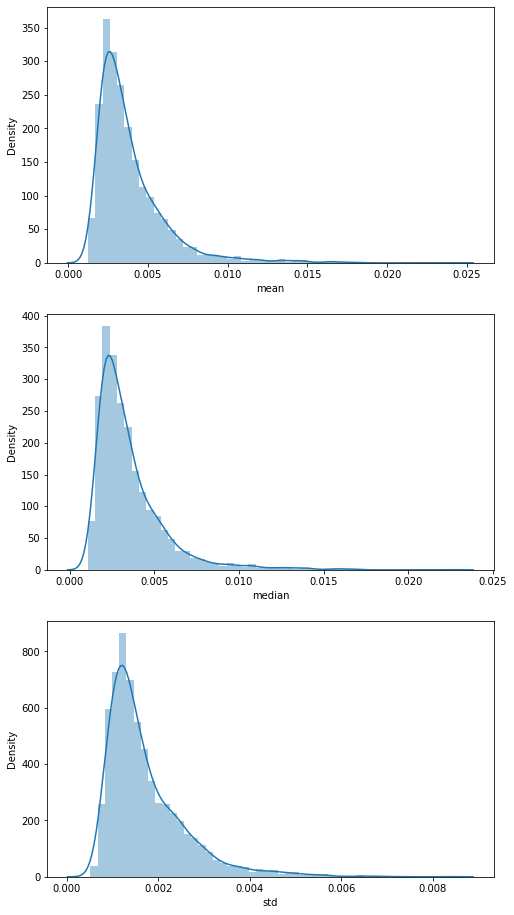

In [83]:
fig,ax = plt.subplots(3,1,figsize=(8,16))

for i,method in enumerate(["mean","median","std"]):
    sns.distplot(time[method],ax=ax[i])


# xgboost

In [89]:
train_info = train.copy()
train_info['stock_id_mean']     = train['stock_id'].map(dict(zip(stock['stock_id'], stock['mean'])))
train_info['stock_id_median']   = train['stock_id'].map(dict(zip(stock['stock_id'], stock['median'])))
train_info['stock_id_std']      = train['stock_id'].map(dict(zip(stock['stock_id'], stock['std'])))
train_info['time_id_mean']      = train['time_id'].map(dict(zip(time['time_id'], time['mean'])))
train_info['time_id_median']    = train['time_id'].map(dict(zip(time['time_id'], time['median'])))
train_info['time_id_std']        = train['time_id'].map(dict(zip(time['time_id'], time['std'])))
train_info

,stock_id,time_id,target,stock_id_mean,stock_id_median,stock_id_std,time_id_mean,time_id_median,time_id_std
0,0,5,0.004136,0.004028,0.003180,0.002855,0.004618,0.004270,0.002179
1,0,11,0.001445,0.004028,0.003180,0.002855,0.002042,0.001831,0.001085
2,0,16,0.002168,0.004028,0.003180,0.002855,0.002471,0.002354,0.000774
3,0,31,0.002195,0.004028,0.003180,0.002855,0.002700,0.002201,0.001431
4,0,62,0.001747,0.004028,0.003180,0.002855,0.002448,0.002254,0.001146
...,...,...,...,...,...,...,...,...,...
428927,126,32751,0.003461,0.005321,0.004443,0.003179,0.002870,0.002546,0.001261
428928,126,32753,0.003113,0.005321,0.004443,0.003179,0.001998,0.001690,0.001340
428929,126,32758,0.004070,0.005321,0.004443,0.003179,0.002517,0.002478,0.000877
428930,126,32763,0.003357,0.005321,0.004443,0.003179,0.004492,0.004304,0.001461


In [90]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,random_state=123,shuffle=True)

In [93]:
y = train_info["target"]
X = train_info.drop(["stock_id","time_id","target"],axis=1)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [101]:
scaler = StandardScaler()
#scaler = PowerTransformer()
scaler.fit(X)

models = [LinearRegression(),Lasso(),Ridge(),SVR(),xgb.XGBRegressor()]


LinearRegression()
44.13999463908015
Lasso()
0.7566556704555036
Ridge()
32.00414289259719
SVR()
0.8933613788678247
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.2689935496733733


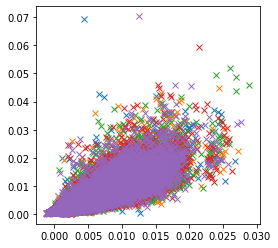

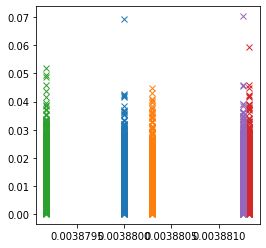

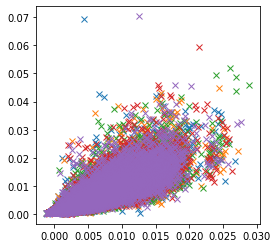

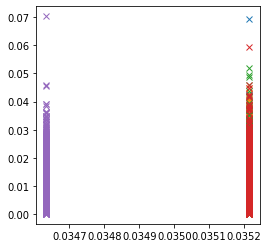

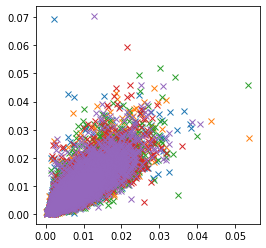

In [115]:
for model in models:
    scores = []
    print(model)

    plt.figure(figsize=(4,4))    
    
    for train_index, test_index in kf.split(X, y):
        X_train = scaler.transform(X.iloc[train_index,:])
        y_train = y[train_index]
        X_test  = scaler.transform(X.iloc[test_index,:])
        y_test  = y[test_index]

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        plt.plot(y_pred,y_test,'x')
        #
        scores.append((rmspe(y_test,y_pred)))
    print(np.mean(scores))
    

In [114]:
print(scores)

[56.93649519408975, 22.862836946073624, 25.22833570828859, 28.911512771378327, 86.76079257557049, 0.752851629105558, 0.7527347781918925, 0.7623632507307508, 0.759830073207073, 0.7554986210422442, 17.25762375017062, 53.24568660853835, 28.62013746959879, 38.46145351405431, 22.43581312062386, 0.893613205318559, 0.8936512255017219, 0.8936171945294688, 0.8938377321662359, 0.8920875368231379, 0.2882307472582311, 0.26126296055296644, 0.26075042678828475, 0.26604074801070243, 0.2686828657566817]


In [117]:
test_info = test.copy()
test_info['stock_id_mean']     = test['stock_id'].map(dict(zip(stock['stock_id'], stock['mean'])))
test_info['stock_id_median']   = test['stock_id'].map(dict(zip(stock['stock_id'], stock['median'])))
test_info['stock_id_std']      = test['stock_id'].map(dict(zip(stock['stock_id'], stock['std'])))
test_info['time_id_mean']      = test['time_id'].map(dict(zip(time['time_id'], time['mean'])))
test_info['time_id_median']    = test['time_id'].map(dict(zip(time['time_id'], time['median'])))
test_info['time_id_std']       = test['time_id'].map(dict(zip(time['time_id'], time['std'])))
test_info



,stock_id,time_id,row_id,stock_id_mean,stock_id_median,stock_id_std,time_id_mean,time_id_median,time_id_std
0,0,4,0-4,0.004028,0.00318,0.002855,NaN,NaN,NaN
1,0,32,0-32,0.004028,0.00318,0.002855,NaN,NaN,NaN
2,0,34,0-34,0.004028,0.00318,0.002855,NaN,NaN,NaN


In [116]:
model  = models[4]
print(clf)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [118]:
X_test = test_info.drop(["stock_id","time_id","row_id"],axis=1)

In [119]:
model.fit(scaler.transform(X),y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [124]:
y_pred = model.predict(scaler.transform(X_test))

In [125]:
y_pred

array([0.00128122, 0.00128122, 0.00128122], dtype=float32)

In [126]:
sub = test.copy()
sub["target"] = y_pred
sub.drop(["stock_id","time_id"],axis=1,inplace=True)

In [127]:
sub
# sub.to_csv("submission.csv", index=False)

,row_id,target
0,0-4,0.001281
1,0-32,0.001281
2,0-34,0.001281
